In [13]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df1 = pd.read_csv("/content/drive/MyDrive/output_dataframe.csv")
df2 = pd.read_csv("/content/drive/MyDrive/pred_case2_main.csv")
df_ = pd.read_csv("/content/drive/MyDrive/final_dataframe.csv")

In [32]:
df1.rename(columns = {'tweet_date':'Date'}, inplace=True)
df1

,Date,average_sentiment
0,2021-10-19,1
1,2021-10-21,-1
2,2021-10-22,-1
3,2021-10-23,1
4,2021-10-24,-1
...,...,...
539,2023-04-17,1
540,2023-04-18,1
541,2023-04-19,1
542,2023-04-20,-1


In [33]:
df2

,Date,Short Probability,Long Probability,Predictions,Label
0,2012-02-13,0.532320,0.467680,-1,1
1,2012-02-14,0.586058,0.413942,-1,1
2,2012-02-15,0.660884,0.339116,-1,1
3,2012-02-16,0.592487,0.407513,-1,1
4,2012-02-17,0.530303,0.469697,-1,-1
...,...,...,...,...,...
2722,2023-02-09,0.587054,0.412946,-1,1
2723,2023-02-10,0.555382,0.444618,-1,1
2724,2023-02-13,0.557212,0.442788,-1,-1
2725,2023-02-14,0.586970,0.413030,-1,1


In [35]:
merged_df = df1.merge(df2, on='Date')

print(merged_df)

           Date  average_sentiment  Short Probability  Long Probability  \
0    2021-10-19                  1           0.410033          0.589967   
1    2021-10-21                 -1           0.487290          0.512710   
2    2021-10-22                 -1           0.438359          0.561641   
3    2021-10-25                 -1           0.481049          0.518951   
4    2021-10-26                 -1           0.431402          0.568598   
..          ...                ...                ...               ...   
321  2023-02-09                  1           0.587054          0.412946   
322  2023-02-10                  1           0.555382          0.444618   
323  2023-02-13                  1           0.557212          0.442788   
324  2023-02-14                 -1           0.586970          0.413030   
325  2023-02-15                  1           0.467395          0.532605   

     Predictions  Label  
0              1     -1  
1              1     -1  
2              1     

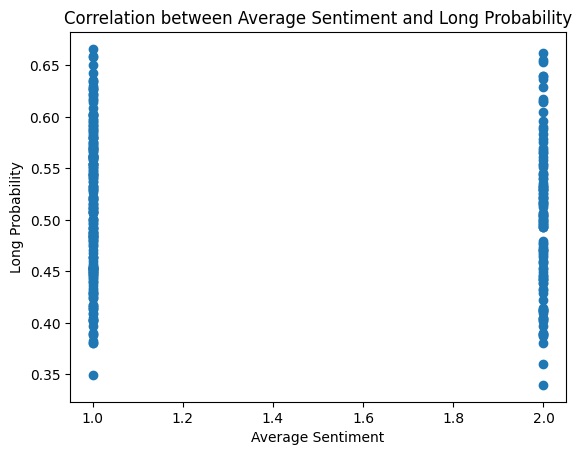

In [49]:
plt.scatter(merged_df['average_sentiment'], merged_df['Long Probability'])
plt.xlabel('Average Sentiment')
plt.ylabel('Long Probability')
plt.title('Correlation between Average Sentiment and Long Probability')
plt.show()

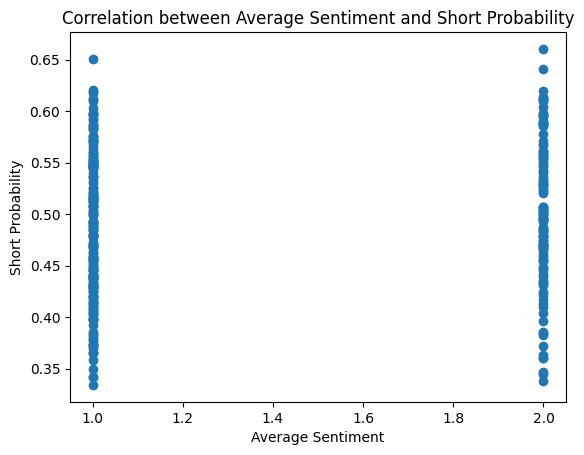

In [50]:
plt.scatter(merged_df['average_sentiment'], merged_df['Short Probability'])
plt.xlabel('Average Sentiment')
plt.ylabel('Short Probability')
plt.title('Correlation between Average Sentiment and Short Probability')
plt.show()

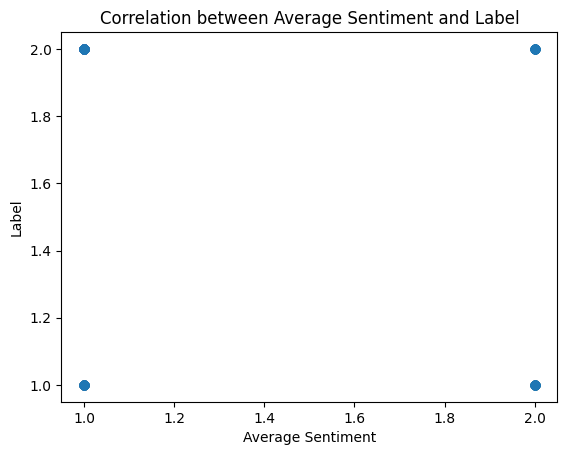

In [46]:
plt.scatter(merged_df['average_sentiment'], merged_df['Label'])
plt.xlabel('Average Sentiment')
plt.ylabel('Label')
plt.title('Correlation between Average Sentiment and Label')
plt.show()

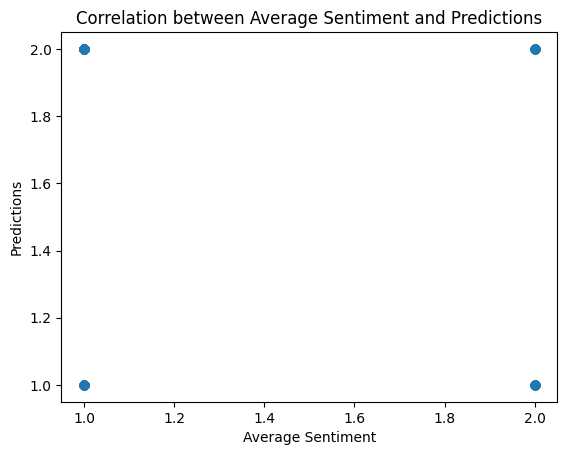

In [47]:
plt.scatter(merged_df['average_sentiment'], merged_df['Predictions'])
plt.xlabel('Average Sentiment')
plt.ylabel('Predictions')
plt.title('Correlation between Average Sentiment and Predictions')
plt.show()

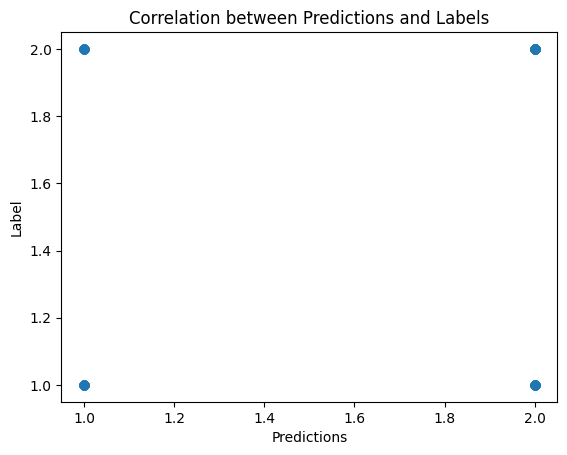

In [48]:
plt.scatter(merged_df['Predictions'], merged_df['Label'])
plt.xlabel('Predictions')
plt.ylabel('Label')
plt.title('Correlation between Predictions and Labels')
plt.show()

In [7]:
merged_df.corr()

<ipython-input-7-5805580b1846>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,average_sentiment,Short Probability,Long Probability,Predictions,Label
average_sentiment,1.000000,0.119844,-0.119844,-0.064449,-0.120187
Short Probability,0.119844,1.000000,-1.000000,-0.833733,-0.124447
Long Probability,-0.119844,-1.000000,1.000000,0.833733,0.124447
Predictions,-0.064449,-0.833733,0.833733,1.000000,0.133906
Label,-0.120187,-0.124447,0.124447,0.133906,1.000000


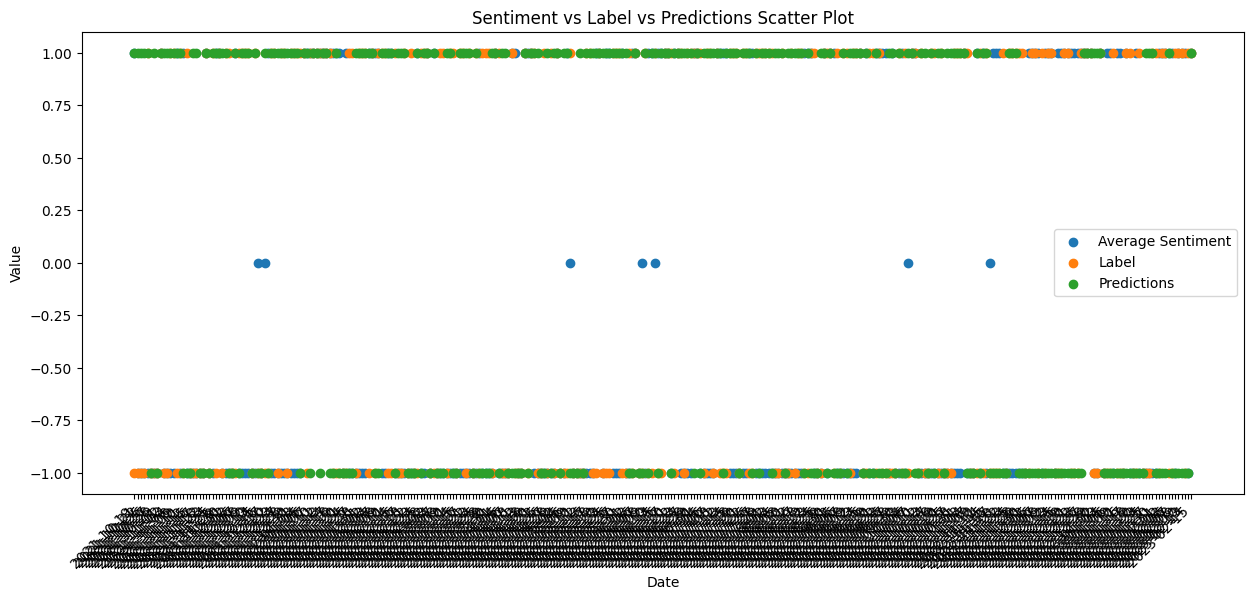

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(merged_df['Date'], merged_df['average_sentiment'], label='Average Sentiment')
plt.scatter(merged_df['Date'], merged_df['Label'], label='Label')
plt.scatter(merged_df['Date'], merged_df['Predictions'], label='Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Sentiment vs Label vs Predictions Scatter Plot')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
merged_df['average_sentiment'] = merged_df['average_sentiment'].map({-1: 1, 1: 2})
merged_df['Label'] = merged_df['Label'].map({-1: 1, 1: 2})
merged_df['Predictions'] = merged_df['Predictions'].map({-1: 1, 1: 2})
merged_df

,Date,average_sentiment,Short Probability,Long Probability,Predictions,Label
0,2021-10-19,2.0,0.410033,0.589967,2,1
1,2021-10-21,1.0,0.487290,0.512710,2,1
2,2021-10-22,1.0,0.438359,0.561641,2,1
3,2021-10-25,1.0,0.481049,0.518951,2,1
4,2021-10-26,1.0,0.431402,0.568598,2,2
...,...,...,...,...,...,...
321,2023-02-09,2.0,0.587054,0.412946,1,2
322,2023-02-10,2.0,0.555382,0.444618,1,2
323,2023-02-13,2.0,0.557212,0.442788,1,1
324,2023-02-14,1.0,0.586970,0.413030,1,2


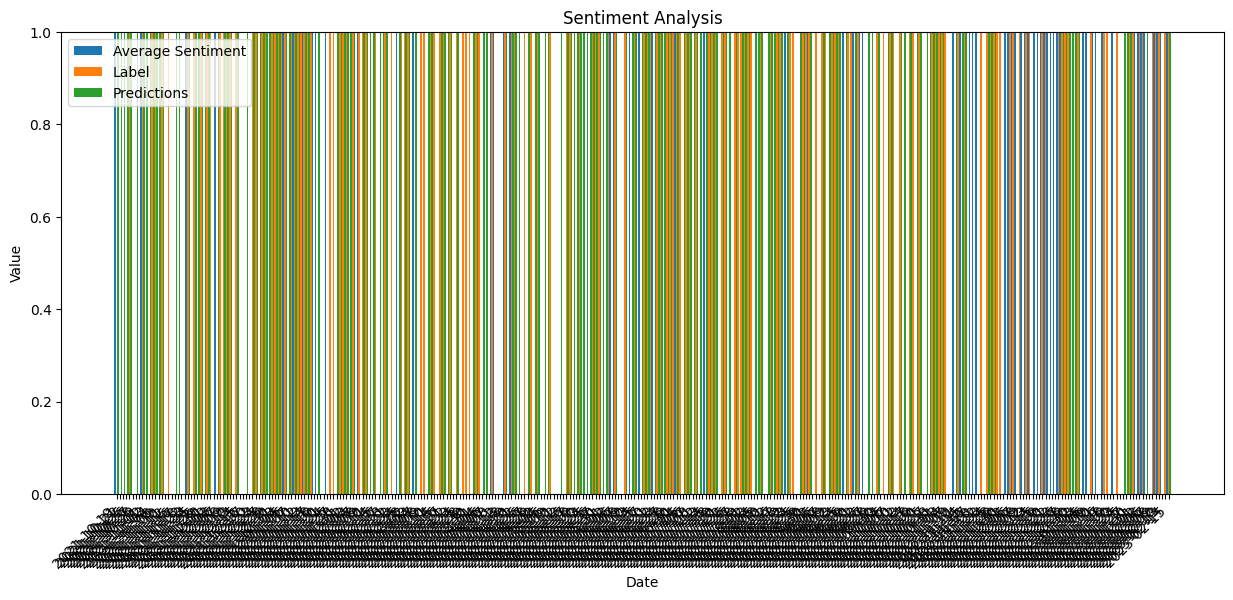

In [ ]:
plt.figure(figsize=(15, 6))
bar_width = 0.5
x = np.arange(len(merged_df['Date']))
plt.bar(x, merged_df['average_sentiment'] - 1, width=bar_width, align='center', label='Average Sentiment')
plt.bar(x + bar_width, merged_df['Label'] - 1, width=bar_width, align='center', label='Label')
plt.bar(x + 2 * bar_width, merged_df['Predictions'] - 1, width=bar_width, align='center', label='Predictions')
plt.xticks(x + bar_width, merged_df['Date'], rotation=45, ha='right')
plt.ylim(0, 1)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Sentiment Analysis')
plt.legend()
plt.show()